<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/train.csv")
df_lightgbm5 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving5.csv", header=None)
df_prophet6 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving6.csv", header=None)
df_prophet9 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving9.csv", header=None)
df_prophet13 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving13.csv", header=None)
df_prophet17 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving17.csv", header=None)
sample_submit = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/sample_submit.csv", header=None)

In [3]:
# 2015年度のデータをbaselineとする
df_train_bl = df_train[-366:].reset_index(drop=True)
df_train_bl.head()

,datetime,y,client,close,price_am,price_pm
0,2015-04-01,61,1,0,3,3
1,2015-04-02,60,1,0,2,2
2,2015-04-03,75,1,0,2,1
3,2015-04-04,86,1,0,4,3
4,2015-04-05,69,1,0,2,2


In [4]:
df_lightgbm5.columns = ['datetime', 'y']
df_prophet6.columns = ['datetime', 'y']
df_prophet9.columns = ['datetime', 'y']
df_prophet13.columns = ['datetime', 'y']
df_prophet17.columns = ['datetime', 'y']

In [5]:
df_lightgbm5.head()

,datetime,y
0,2016-04-01,68.228807
1,2016-04-02,65.349049
2,2016-04-03,64.418783
3,2016-04-04,64.757358
4,2016-04-05,55.602259


In [6]:
df_diff = df_lightgbm5.copy()
df_diff["yhat9"] = df_prophet9["y"]
df_diff["yhat17"] = df_prophet17["y"]
df_diff["yhat_diff_9_17"] = df_prophet17["y"] - df_prophet9["y"]

pd.set_option('display.max_rows', None)
df_diff

,datetime,y,yhat9,yhat17,yhat_diff_9_17
0,2016-04-01,68.228807,82.849854,75.368124,-7.481730
1,2016-04-02,65.349049,90.433463,73.615278,-16.818186
2,2016-04-03,64.418783,83.721052,72.391210,-11.329841
3,2016-04-04,64.757358,74.731621,71.811670,-2.919951
4,2016-04-05,55.602259,67.385577,60.752180,-6.633397
5,2016-04-06,51.868016,64.206428,58.677636,-5.528792
6,2016-04-07,49.928263,62.848485,56.343241,-6.505244
7,2016-04-08,58.617816,65.912146,64.866650,-1.045496
8,2016-04-09,59.084288,73.822140,67.251383,-6.570757
9,2016-04-10,61.713682,67.143169,70.669852,3.526683


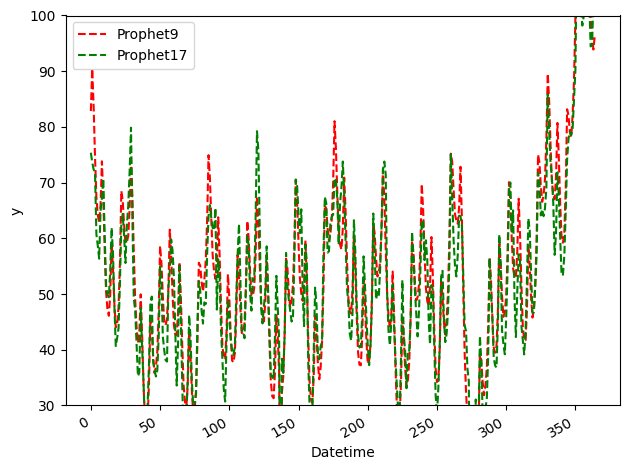

In [7]:
fig, ax = plt.subplots()

# ax.plot(df_train_bl['y'], ls='--', label='Baseline')
# ax.plot(df_lightgbm5['y'], color='blue', label='LightGBM')
# ax.plot(df_prophet6['y'], color='darkorange', label='Prophet6')
ax.plot(df_prophet9['y'], ls='--', color='red', label='Prophet9')
# ax.plot(df_prophet13['y'], ls='--', color='blue', label='Prophet13')
ax.plot(df_prophet17['y'], ls='--', color='green', label='Prophet17')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(30, 100)

fig.autofmt_xdate()
plt.tight_layout()

In [8]:
df_diff["yhat_ensem_9_17"] = df_prophet9["y"]*0.3 + df_prophet17["y"]*0.7

In [9]:
df_submit = pd.DataFrame({
    'datetime': sample_submit.iloc[:, 0].reset_index(drop=True),
    'y': df_diff["yhat_ensem_9_17"].reset_index(drop=True)
})

display(df_submit.head(), df_submit.tail())

,datetime,y
0,2016-04-01,77.612643
1,2016-04-02,78.660733
2,2016-04-03,75.790163
3,2016-04-04,72.687655
4,2016-04-05,62.742199


,datetime,y
360,2017-03-27,104.575915
361,2017-03-28,96.359607
362,2017-03-29,95.118789
363,2017-03-30,99.991282
364,2017-03-31,107.684746


In [10]:
df_submit.to_csv("submit_moving19.csv", index=False, header=False)